### Arrangement Creation
##### In this notebook, I create an algorithm that tries to automate the creation of arrangements that maximize or minimize the disparity between all possible NN and optimal routes from each position in the arrangement. I will try to take cues from the GA to implement variation and finding valid solutions. 

In [1]:
import random
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

Create the initial population of location dataframes with location identifiers and x,y pairs that can be handled by the TSP algorithms. The area of points is defined by a hexagon placed onto the unity terrain approximating an area where trees would be located. 

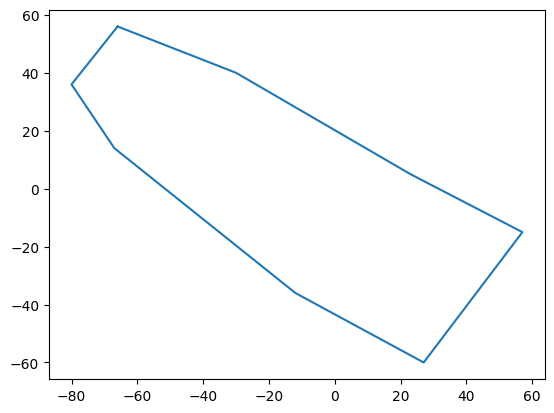

In [2]:
# create polygon adjusted to level boundaries, will generate points here
# poly = Polygon([[-74, 46], [-67, 14], [-12, -36],
#                [35, -38], [23, 5], [-30, 40]])

poly = Polygon([
    [-66, 56], [-30, 40], [23, 5], [57, -15],
    [27, -60], [-12, -36], [-67, 14], [-80, 36]
])

# Plot the polygon
xp, yp = poly.exterior.xy
plt.plot(xp, yp)
plt.show()

Run the algorithm to find good arrangements to use to exaggerate the theoretical differences between TSP strategies. 

In [ ]:
%run -i src/arr_ga_funs.py
final_pop_arrangements = arrangement_ga(
    n_population=50, polygon=poly, n_locations=12, n_generations=30,
    crossover_rate=.9, mutation_rate=.45
)

Completed generation 0
Completed generation 1
Completed generation 2
Completed generation 3
Completed generation 4
Completed generation 5
Completed generation 6
Completed generation 7
Completed generation 8
Completed generation 9
Completed generation 10
Completed generation 11
Completed generation 12
Completed generation 13
Completed generation 14
Completed generation 15
Completed generation 16
Completed generation 17
Completed generation 18
Completed generation 19


Random
Mean:  14123.06915629764 
Stdev:  15164.084648856306 
GA Results
Mean:  159532.30870979503 
Stdev:  73335.9214177952
235567.86765795725


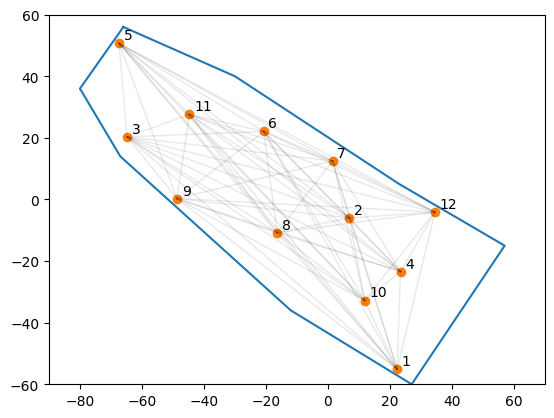

In [43]:
%run -i src/arr_ga_funs.py
best_deviation, best_deviation_score = arrangement_pop_summary(
    population=final_pop_arrangements, polygon=poly, n_locations=12
)

plot_arrangement(polygon=poly, arrangement_df=best_deviation)
print(best_deviation_score)

211279.89652873937


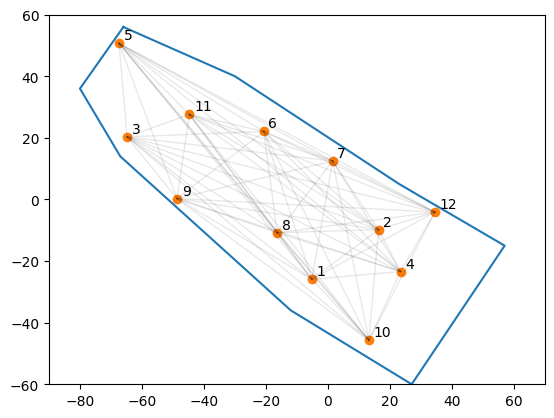

In [52]:
%run -i src/arr_ga_funs.py
i = random.randint(0, 50)
arrangement_df = final_pop_arrangements[i]
plot_arrangement(polygon=poly, arrangement_df=arrangement_df)
print(find_deviation_score(arrangement_df))

In [22]:
i
arrangement_df.to_csv(
    "../arrangements/nn_optimal/10_points/generated_10p_nn_optimal2.csv")

In [53]:
# write to csv
best_deviation.to_csv(
    "../arrangements/nn_suboptimal/12_points/generated_12p_nn_suboptimal2.csv")

In [54]:
# check out this or previous dfs
# arrangement_df = pd.read_csv("../arrangements/nn_suboptimal/designed_12p_nn_suboptimal1.csv")
arrangement_df = best_deviation

%run -i src/nn_funs.py
%run -i src/ga_funs.py
%run -i src/arr_ga_funs.py
dist_matrix = euclid_distance_matrix(arrangement_df)
ga_dict = run_all_ga(
    locations_df=arrangement_df,path_len=12,dist_matrix=dist_matrix,
    n_population=100, n_generations=50, crossover_rate=.9, mutation_rate=.7
)
print(pd.DataFrame(ga_dict))
print(find_deviation_score(arrangement_df))

    start_locations                                    paths   distances  \
0                 1  [1, 4, 12, 2, 8, 7, 6, 11, 5, 3, 9, 10]  365.812753   
1                 2  [2, 12, 4, 1, 10, 8, 9, 5, 3, 11, 6, 7]  349.951375   
2                 3  [3, 9, 11, 6, 8, 2, 10, 1, 4, 12, 7, 5]  386.965762   
3                 4  [4, 12, 2, 7, 6, 11, 5, 3, 9, 8, 1, 10]  339.139543   
4                 5  [5, 3, 9, 11, 6, 8, 10, 1, 4, 12, 2, 7]  381.696048   
5                 6  [6, 8, 10, 1, 4, 12, 2, 7, 9, 3, 5, 11]  359.371468   
6                 7  [7, 12, 4, 1, 10, 2, 8, 9, 3, 5, 11, 6]  338.141000   
7                 8  [8, 10, 1, 4, 12, 2, 7, 6, 11, 5, 3, 9]  332.871287   
8                 9  [9, 3, 5, 11, 8, 2, 10, 1, 4, 12, 7, 6]  362.552242   
9                10  [10, 1, 4, 12, 2, 8, 7, 6, 11, 5, 3, 9]  365.812753   
10               11  [11, 5, 6, 7, 2, 12, 4, 1, 10, 8, 9, 3]  353.884491   
11               12  [12, 4, 1, 10, 8, 2, 7, 6, 11, 5, 3, 9]  378.157451   

    populat

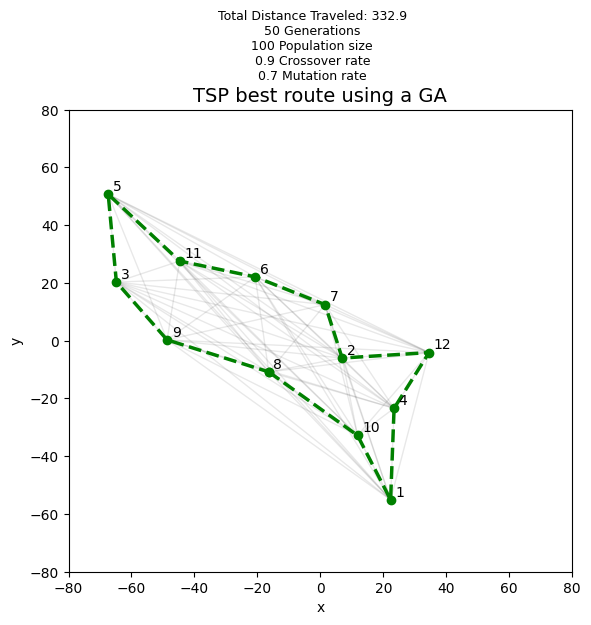

In [57]:
%run -i src/arr_ga_funs.py
plot_ga_path(8, ga_dict, arrangement_df)

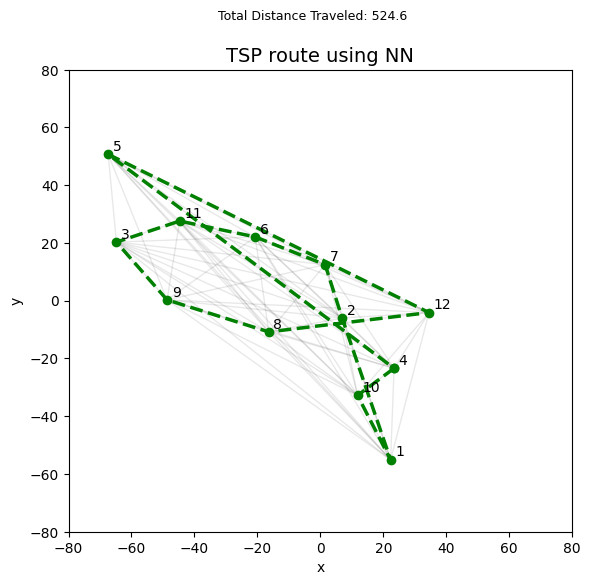

    start_locations                                    paths   distances
0                 1  [1, 10, 4, 12, 2, 7, 6, 11, 3, 9, 8, 5]  457.405712
1                 2  [2, 7, 6, 11, 3, 9, 8, 10, 4, 12, 1, 5]  506.865457
2                 3  [3, 11, 6, 7, 2, 8, 9, 5, 10, 4, 12, 1]  521.088653
3                 4  [4, 10, 1, 2, 7, 6, 11, 3, 9, 8, 12, 5]  524.569999
4                 5  [5, 3, 11, 6, 7, 2, 8, 9, 10, 4, 12, 1]  475.223661
5                 6  [6, 7, 2, 8, 9, 3, 11, 5, 10, 4, 12, 1]  473.936335
6                 7  [7, 2, 8, 6, 11, 3, 9, 5, 10, 4, 12, 1]  477.128062
7                 8  [8, 2, 7, 6, 11, 3, 9, 5, 10, 4, 12, 1]  456.230670
8                 9  [9, 3, 11, 6, 7, 2, 8, 10, 4, 12, 1, 5]  456.794748
9                10  [10, 4, 12, 2, 7, 6, 11, 3, 9, 8, 1, 5]  526.771882
10               11  [11, 3, 9, 8, 2, 7, 6, 5, 10, 4, 12, 1]  514.378165
11               12  [12, 4, 10, 1, 2, 7, 6, 11, 3, 9, 8, 5]  458.192159


In [61]:
# view nn paths
%run -i src/nn_funs.py
nn_dict = run_all_nn(arrangement_df, dist_matrix, 12)
plot_nn_path(4, nn_dict, arrangement_df)
print(pd.DataFrame(nn_dict))